
## Dory Report


In [6]:
import os
import copy
import json
import numpy as np
import pandas as pd
import matplotlib
import ipywidgets as widgets
import matplotlib.pyplot as plt
from datetime import datetime
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider, Select
from IPython.display import display, display_markdown, HTML

In [7]:
# Define init variable
INPUT_DATA_FN = "output_result.json"


In [8]:
# Result data handling

## load result data file
input_data_fp = os.path.join(os.getcwd(), INPUT_DATA_FN)
with open(input_data_fp) as read_fh:
    full_result_obj = json.load(read_fh)

# get preference name list
preference_name_list = full_result_obj.keys()
    

In [9]:
items_layout = Layout(width='auto')
items_style = {'description_width': 'initial'}
c_slider = Dropdown(layout=items_layout, style=items_style, options=["default"])
d_select = Dropdown(options=preference_name_list, layout=items_layout, style=items_style)


def update_c_range(*args):
    c_slider.options = full_result_obj[d_select.value].keys()

def view3(preference_name='',preference_value=''):
    DATA_LIST = 'time_list'
    DATA_NAME = 'run_time'
    DELETE_KEY = "video-recording-fps"
    HIDE_MISSING_CASE = False
    layout_row = 1
    layout_column = 1
    fig_size_w = 10
    fig_size_h = 5
    matplotlib.rcParams.update({'figure.max_open_warning': 0})

    data_dict = copy.deepcopy(full_result_obj[preference_name])
    for p_value in data_dict:
        if DELETE_KEY in data_dict[p_value]:
            data_dict[p_value].pop(DELETE_KEY)
    #
    # generate merged data
    #
    casename_list = list(set([casename for lable, data in data_dict.items() for casename in data.keys()]))

    case_result = []
    for casename in casename_list:
        result = {
            "casename": casename,
            "result": {}
        }
        for lable, data in data_dict.items():
            result["result"][lable] = {}

        for lable, data in data_dict.items():
            if data.get(casename):
                result["result"][lable][DATA_LIST] = data.get(casename).get(DATA_LIST)
            else:
                result["result"][lable][DATA_LIST] = []
        case_result.append(result)

    #
    # show original data of each cases
    #
    display_markdown('## Merged Result', raw=True)
    display_markdown('Report Generate Time: {}'.format(datetime.now().strftime('%Y-%m-%d %H:%M:%S')), raw=True)
    display_markdown('{} Cases'.format(len(case_result)), raw=True)
    nightly_better_list = []
    for case in sorted(case_result):
        casename = case.get('casename')
        result = case.get('result')
        d = pd.DataFrame(result)

        # drop empty 'DATA_LIST'
        for c in d:
            if (d[c][DATA_LIST] == []) :
                d.drop(c, axis=1, inplace=True)

        # Retrive the value of 'DATA_NAME' from each run
        value = pd.DataFrame([pd.DataFrame(d[c][DATA_LIST])[DATA_NAME] for c in d]).T
        value.columns = d.columns

        # Plot input latency boxplot
        value_min = min(value.min())
        value_max = max(value.max())
        value_median = pd.DataFrame([pd.DataFrame(d[c][DATA_LIST])[DATA_NAME].median() for c in d]).T
        value_median.columns = d.columns

        # When HIDE_MISSING_CASE is enabled, skip the case if the case data less then input data amount.
        if HIDE_MISSING_CASE and len(INPUT_SOURCE) > len(value.T):
            # display summary
            display_markdown('### {}\nskip draw plot box'.format(casename), raw=True)
            display(value.describe())
        else:

            fig, ax = plt.subplots()
            ax.plot(list(range(1,len(list(value_median.median()))+1)), list(value_median.median()), "r:")

            value.plot.box(layout=(layout_row, layout_column),
                           sharey=True, sharex=True, figsize=(fig_size_w, fig_size_h),
                           ylim=(0, value_max*1.1), ax=ax)
            plt.title(casename)
            # display summary
            display_markdown('### {}'.format(casename), raw=True)
            display(value.describe())
    # show plot
    plt.show()
    


## Merged Result

Report Generate Time: 2017-11-06 14:12:07

30 Cases

### test_firefox_amazon_ail_hover_related_product_thumbnail

,16384,2,default
count,10.000000,10.000000,10.000000
mean,432.222222,430.000000,434.444444
std,21.880082,36.307632,28.424569
min,400.000000,388.888889,400.000000
25%,422.222222,400.000000,413.888889
50%,433.333333,422.222222,422.222222
75%,444.444444,452.777778,452.777778
max,466.666667,500.000000,488.888889


### test_firefox_amazon_ail_select_search_suggestion

,16384,2,default
count,10.000000,10.000000,10.000000
mean,6.666667,6.111111,7.777778
std,2.342428,1.756821,5.367177
min,5.555556,5.555556,5.555556
25%,5.555556,5.555556,5.555556
50%,5.555556,5.555556,5.555556
75%,5.555556,5.555556,5.555556
max,11.111111,11.111111,22.222222


### test_firefox_amazon_ail_type_in_search_field

,16384,2,default
count,10.000000,10.000000,10.000000
mean,15.000000,15.000000,13.888889
std,6.441677,7.878536,6.000686
min,5.555556,5.555556,5.555556
25%,11.111111,6.944444,11.111111
50%,11.111111,16.666667,11.111111
75%,22.222222,22.222222,19.444444
max,22.222222,22.222222,22.222222


### test_firefox_facebook_ail_click_close_chat_tab

,16384,2,default
count,10.000000,10.000000,10.000000
mean,44.444444,50.000000,50.000000
std,22.222222,12.001372,12.001372
min,11.111111,33.333333,33.333333
25%,25.000000,44.444444,44.444444
50%,44.444444,50.000000,50.000000
75%,63.888889,55.555556,55.555556
max,77.777778,66.666667,66.666667


### test_firefox_facebook_ail_click_open_chat_tab

,16384,2,default
count,10.000000,10.000000,10.000000
mean,218.888889,205.555556,235.555556
std,69.101623,81.186334,67.036014
min,144.444444,122.222222,133.333333
25%,161.111111,133.333333,172.222222
50%,194.444444,200.000000,266.666667
75%,283.333333,286.111111,275.000000
max,322.222222,288.888889,300.000000


### test_firefox_facebook_ail_click_open_chat_tab_emoji

,16384,2,default
count,10.000000,10.000000,10.000000
mean,64.444444,65.555556,81.111111
std,8.764563,12.227833,18.921540
min,44.444444,44.444444,66.666667
25%,66.666667,58.333333,66.666667
50%,66.666667,66.666667,72.222222
75%,66.666667,66.666667,88.888889
max,77.777778,88.888889,122.222222


### test_firefox_facebook_ail_click_photo_viewer_right_arrow

,16384,2,default
count,10.000000,10.000000,10.000000
mean,97.777778,95.555556,111.111111
std,11.475506,7.768954,11.712139
min,77.777778,77.777778,100.000000
25%,100.000000,91.666667,100.000000
50%,100.000000,100.000000,111.111111
75%,100.000000,100.000000,122.222222
max,111.111111,100.000000,122.222222


### test_firefox_facebook_ail_scroll_home_1_txt

,16384,2,default
count,10.000000,10.000000,10.000000
mean,51.111111,42.222222,46.666667
std,7.768954,10.210406,8.764563
min,33.333333,33.333333,33.333333
25%,47.222222,33.333333,44.444444
50%,55.555556,38.888889,44.444444
75%,55.555556,52.777778,55.555556
max,55.555556,55.555556,55.555556


### test_firefox_facebook_ail_type_comment_1_txt

,16384,2,default
count,10.000000,10.000000,10.000000
mean,34.444444,24.444444,36.666667
std,16.101530,8.764563,7.499428
min,11.111111,11.111111,33.333333
25%,25.000000,22.222222,33.333333
50%,33.333333,22.222222,33.333333
75%,44.444444,33.333333,33.333333
max,55.555556,33.333333,55.555556


### test_firefox_facebook_ail_type_composerbox_1_txt

,16384,2,default
count,10.000000,10.000000,10.000000
mean,27.777778,29.444444,36.666667
std,15.930232,9.091065,15.757072
min,11.111111,5.555556,11.111111
25%,22.222222,33.333333,33.333333
50%,22.222222,33.333333,33.333333
75%,33.333333,33.333333,41.666667
max,66.666667,33.333333,66.666667


### test_firefox_facebook_ail_type_message_1_txt

,16384,2,default
count,10.000000,10.000000,10.000000
mean,25.000000,18.333333,26.111111
std,10.227186,12.015651,15.724392
min,5.555556,5.555556,5.555556
25%,22.222222,6.944444,11.111111
50%,27.777778,16.666667,33.333333
75%,33.333333,30.555556,33.333333
max,33.333333,33.333333,55.555556


### test_firefox_gdoc_ail_pagedown_10_text

,16384,2,default
count,10.000000,10.000000,10.000000
mean,41.111111,46.666667,37.777778
std,12.883353,11.475506,7.768954
min,22.222222,33.333333,33.333333
25%,33.333333,36.111111,33.333333
50%,38.888889,44.444444,33.333333
75%,44.444444,55.555556,41.666667
max,66.666667,66.666667,55.555556


### test_firefox_gdoc_ail_type_0

,16384,2,default
count,10.000000,10.000000,10.000000
mean,70.000000,57.777778,68.888889
std,9.147473,10.210406,12.614360
min,55.555556,44.444444,44.444444
25%,66.666667,47.222222,66.666667
50%,66.666667,61.111111,66.666667
75%,75.000000,66.666667,66.666667
max,88.888889,66.666667,88.888889


### test_firefox_gmail_ail_compose_new_mail_via_keyboard

,16384,2,default
count,10.000000,10.000000,10.000000
mean,211.111111,191.111111,206.666667
std,32.288140,12.614360,15.887119
min,188.888889,177.777778,177.777778
25%,200.000000,177.777778,200.000000
50%,200.000000,194.444444,200.000000
75%,200.000000,200.000000,219.444444
max,300.000000,211.111111,233.333333


### test_firefox_gmail_ail_open_mail

,16384,2,default
count,10.000000,10.000000,10.000000
mean,210.000000,217.777778,214.444444
std,21.880082,30.180072,27.241742
min,177.777778,200.000000,177.777778
25%,200.000000,200.000000,200.000000
50%,200.000000,211.111111,216.666667
75%,219.444444,219.444444,230.555556
max,255.555556,300.000000,266.666667


### test_firefox_gmail_ail_reply_mail

,16384,2,default
count,10.000000,10.000000,10.000000
mean,235.555556,246.666667,230.000000
std,4.684856,12.614360,11.770555
min,233.333333,233.333333,200.000000
25%,233.333333,236.111111,233.333333
50%,233.333333,244.444444,233.333333
75%,233.333333,252.777778,233.333333
max,244.444444,266.666667,244.444444


### test_firefox_gmail_ail_type_in_reply_field

,16384,2,default
count,10.000000,10.000000,10.000000
mean,17.222222,18.333333,16.111111
std,6.651217,6.441677,6.651217
min,5.555556,5.555556,5.555556
25%,11.111111,13.888889,11.111111
50%,22.222222,22.222222,16.666667
75%,22.222222,22.222222,22.222222
max,22.222222,22.222222,22.222222


### test_firefox_gsearch_ail_select_image_cat

,16384,2,default
count,10.000000,10.000000,10.000000
mean,100.000000,113.333333,96.666667
std,47.430550,124.259121,40.588943
min,77.777778,66.666667,77.777778
25%,77.777778,69.444444,77.777778
50%,88.888889,77.777778,88.888889
75%,88.888889,77.777778,88.888889
max,233.333333,466.666667,211.111111


### test_firefox_gsearch_ail_select_search_suggestion

,16384,2,default
count,10.000000,10.000000,10.000000
mean,10.000000,24.444444,19.444444
std,5.105203,10.210406,7.965116
min,5.555556,11.111111,5.555556
25%,5.555556,13.888889,13.888889
50%,11.111111,27.777778,22.222222
75%,11.111111,33.333333,22.222222
max,22.222222,33.333333,33.333333


### test_firefox_gsearch_ail_type_searchbox

,16384,2,default
count,10.000000,10.000000,10.000000
mean,5.555556,9.444444,9.444444
std,0.000000,6.953698,6.953698
min,5.555556,5.555556,5.555556
25%,5.555556,5.555556,5.555556
50%,5.555556,5.555556,5.555556
75%,5.555556,9.722222,9.722222
max,5.555556,22.222222,22.222222


### test_firefox_gsheet_ail_clicktab_0

,16384,2,default
count,10.000000,8.000000,10.000000
mean,1015.555556,888.888889,965.555556
std,81.683252,253.511494,147.819079
min,944.444444,388.888889,566.666667
25%,977.777778,858.333333,980.555556
50%,988.888889,955.555556,994.444444
75%,1022.222222,966.666667,1008.333333
max,1233.333333,1266.666667,1111.111111


### test_firefox_gsheet_ail_type_0

,16384,2,default
count,10.000000,10.000000,10.000000
mean,44.444444,62.222222,44.444444
std,7.407407,46.021406,11.712139
min,33.333333,33.333333,33.333333
25%,44.444444,36.111111,33.333333
50%,44.444444,55.555556,44.444444
75%,44.444444,55.555556,52.777778
max,55.555556,188.888889,66.666667


### test_firefox_gslide_ail_pagedown_0

,16384,2,default
count,10.000000,10.000000,10.000000
mean,310.000000,275.555556,290.000000
std,48.981394,16.396995,82.560200
min,244.444444,244.444444,122.222222
25%,275.000000,266.666667,255.555556
50%,311.111111,272.222222,266.666667
75%,341.666667,288.888889,363.888889
max,400.000000,300.000000,400.000000


### test_firefox_gslide_ail_type_0

,16384,2,default
count,10.000000,10.000000,10.000000
mean,103.333333,100.000000,104.444444
std,11.770555,15.713484,9.369712
min,88.888889,77.777778,100.000000
25%,100.000000,100.000000,100.000000
50%,100.000000,100.000000,100.000000
75%,108.333333,100.000000,100.000000
max,122.222222,133.333333,122.222222


### test_firefox_outlook_ail_composemail_0

,16384,2,default
count,10.000000,10.000000,10.000000
mean,402.222222,381.111111,380.000000
std,33.864087,18.182130,17.992530
min,344.444444,355.555556,344.444444
25%,372.222222,366.666667,369.444444
50%,411.111111,377.777778,377.777778
75%,433.333333,397.222222,397.222222
max,433.333333,411.111111,400.000000


### test_firefox_outlook_ail_type_composemail_0

,16384,2,default
count,10.000000,10.000000,10.000000
mean,18.888889,19.444444,15.000000
std,18.555519,11.785113,15.055909
min,5.555556,5.555556,5.555556
25%,5.555556,6.944444,6.944444
50%,16.666667,22.222222,11.111111
75%,22.222222,30.555556,11.111111
max,66.666667,33.333333,55.555556


### test_firefox_ymail_ail_compose_new_mail

,16384,2,default
count,10.000000,10.000000,10.000000
mean,307.777778,295.555556,302.222222
std,19.633123,9.369712,33.864087
min,277.777778,277.777778,266.666667
25%,291.666667,288.888889,269.444444
50%,305.555556,300.000000,300.000000
75%,322.222222,300.000000,322.222222
max,333.333333,311.111111,366.666667


### test_firefox_ymail_ail_type_in_reply_field

,16384,2,default
count,10.000000,10.000000,10.000000
mean,16.666667,20.000000,31.111111
std,10.475656,8.764563,29.068766
min,5.555556,11.111111,11.111111
25%,11.111111,11.111111,13.888889
50%,11.111111,22.222222,22.222222
75%,22.222222,22.222222,22.222222
max,33.333333,33.333333,100.000000


### test_firefox_youtube_ail_select_search_suggestion

,16384,2,default
count,10.000000,10.000000,10.000000
mean,15.000000,12.222222,16.111111
std,7.878536,7.314229,12.129276
min,5.555556,5.555556,5.555556
25%,6.944444,5.555556,6.944444
50%,16.666667,11.111111,11.111111
75%,22.222222,19.444444,27.777778
max,22.222222,22.222222,33.333333


### test_firefox_youtube_ail_type_in_search_field

,16384,2,default
count,10.000000,10.000000,10.000000
mean,9.444444,10.555556,7.777778
std,6.953698,8.050765,5.367177
min,5.555556,5.555556,5.555556
25%,5.555556,5.555556,5.555556
50%,5.555556,5.555556,5.555556
75%,9.722222,18.055556,5.555556
max,22.222222,22.222222,22.222222


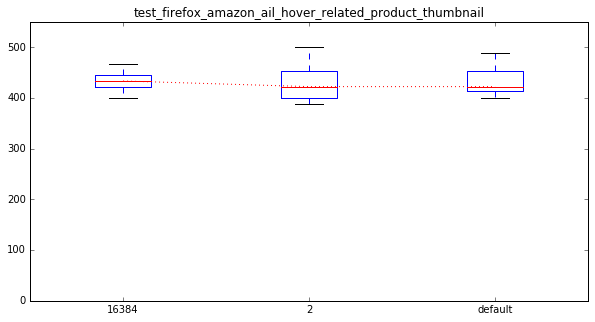

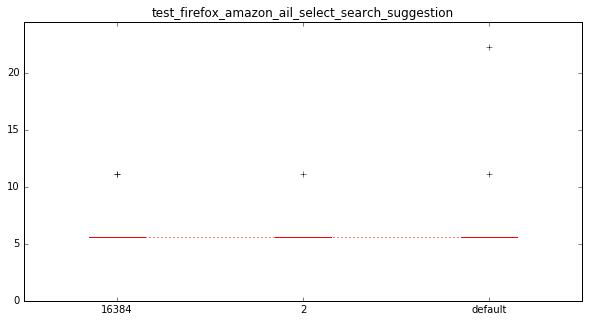

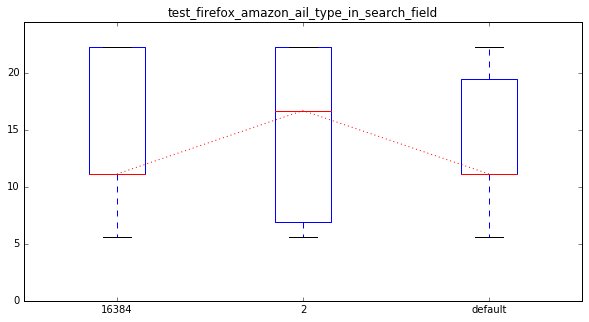

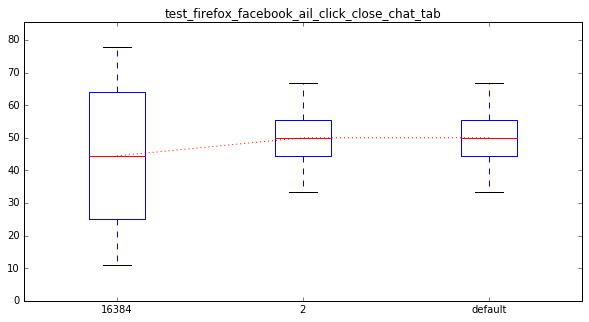

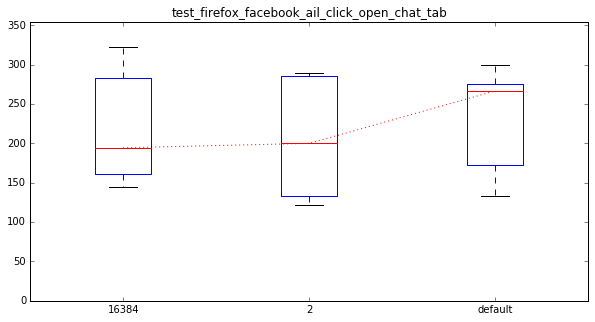

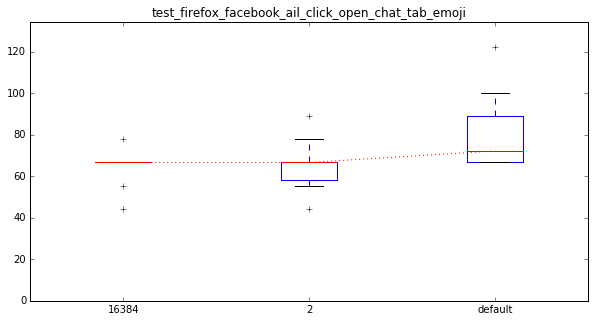

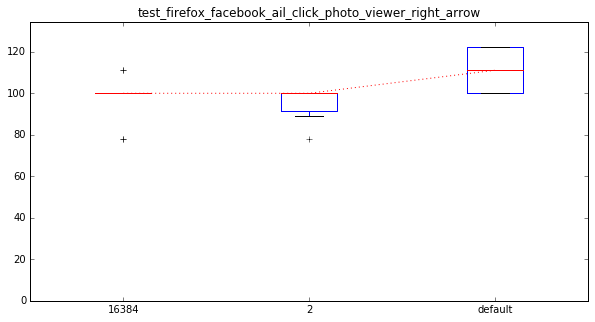

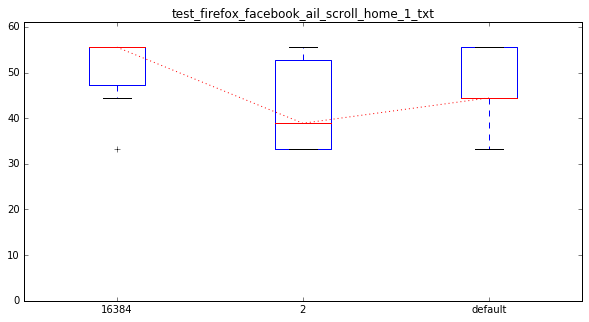

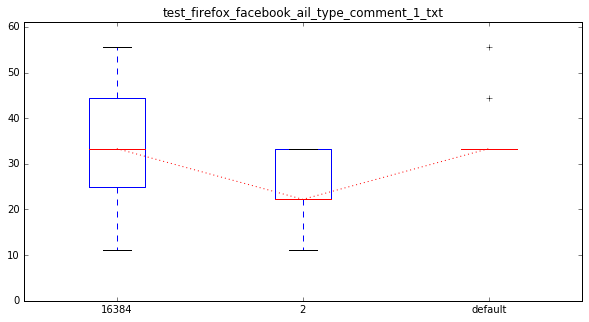

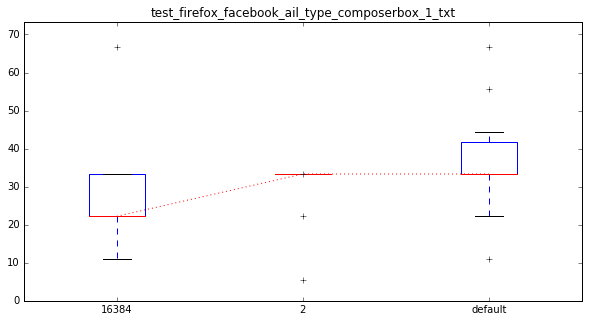

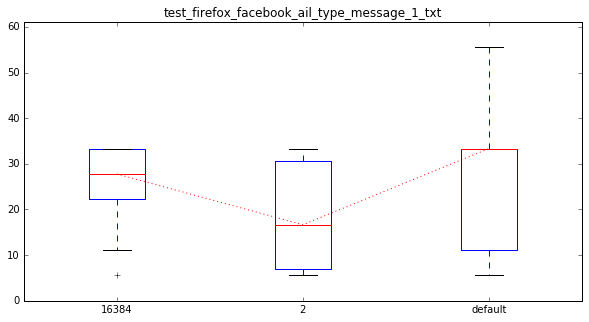

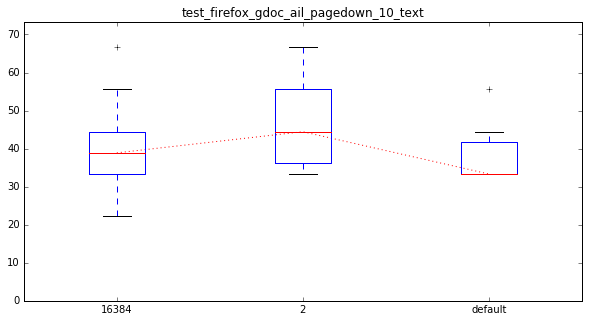

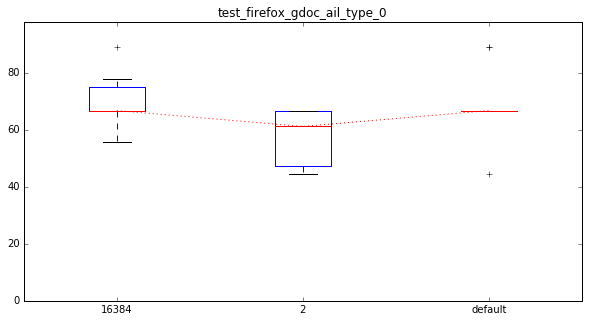

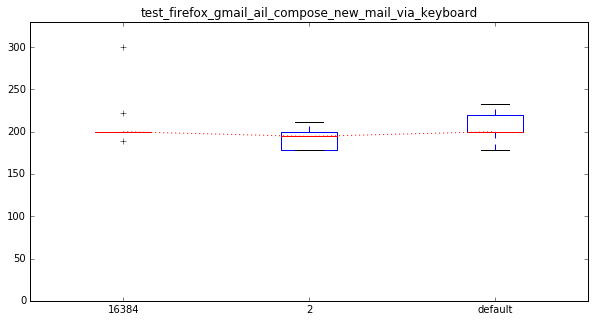

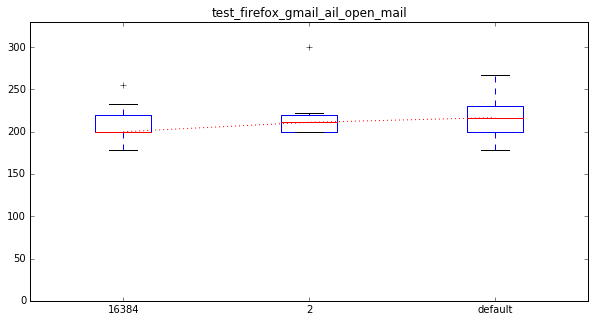

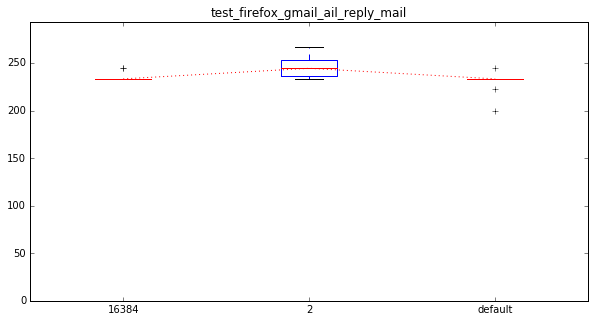

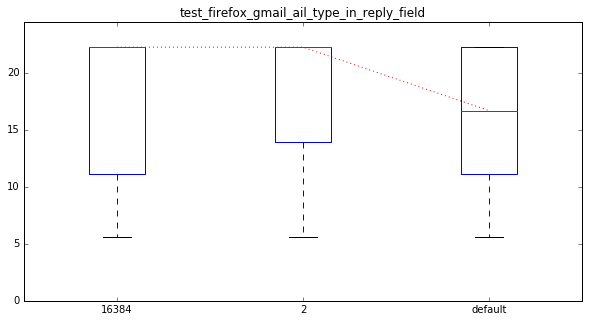

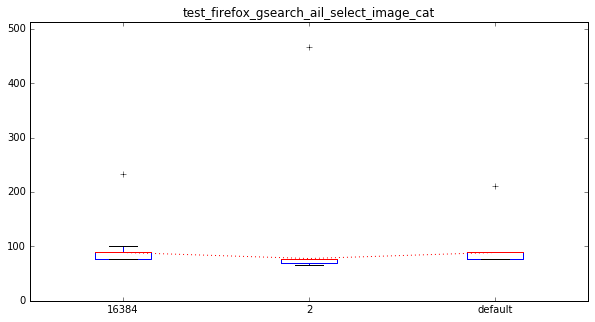

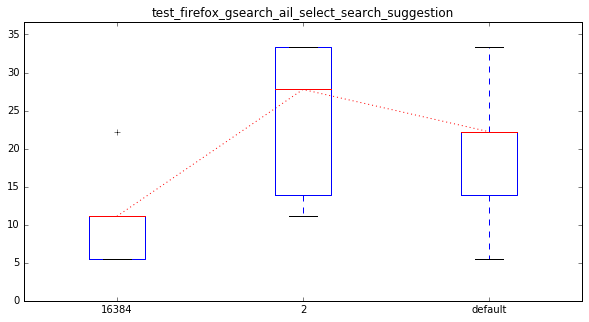

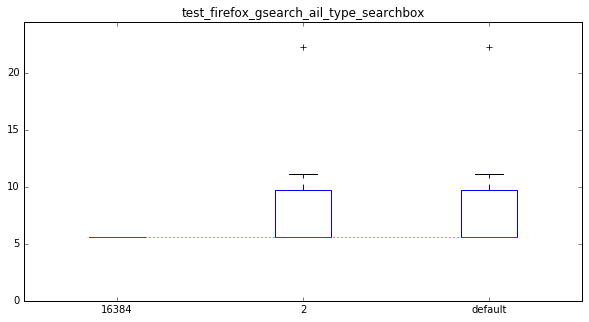

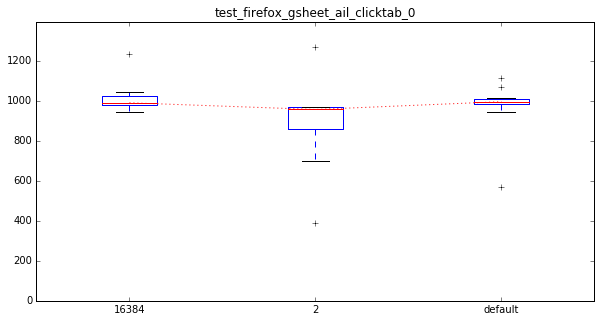

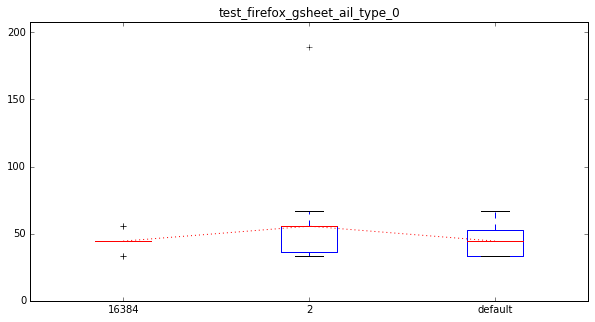

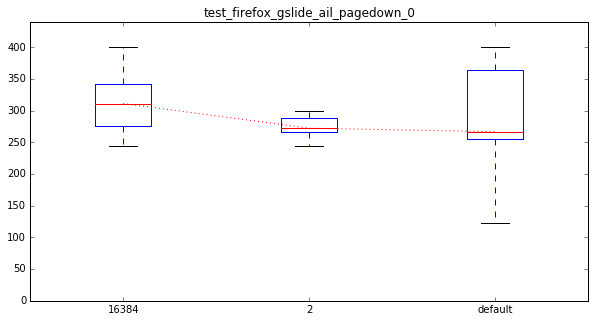

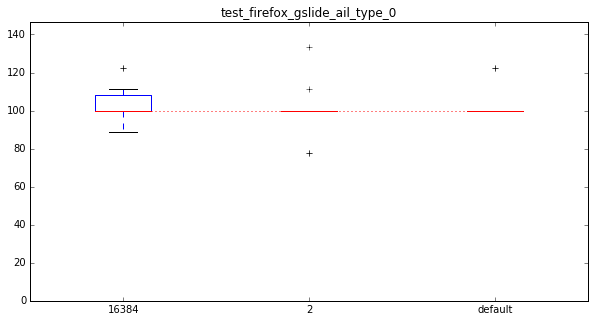

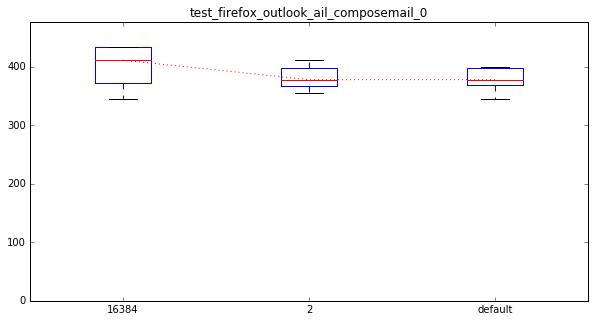

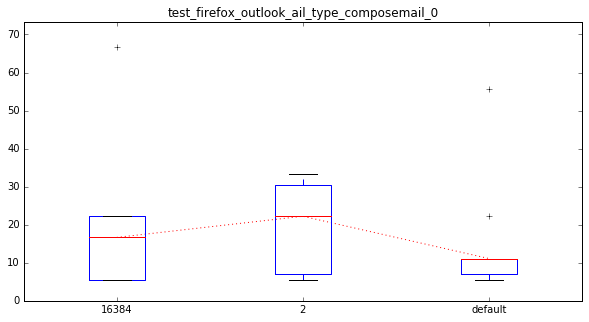

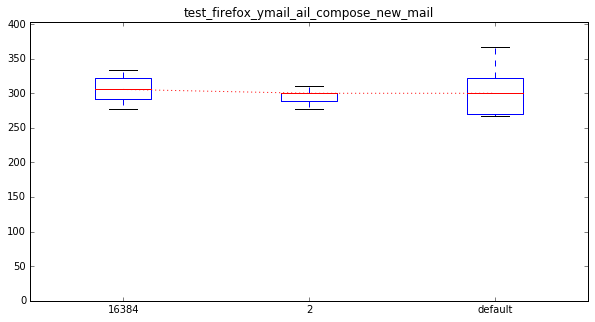

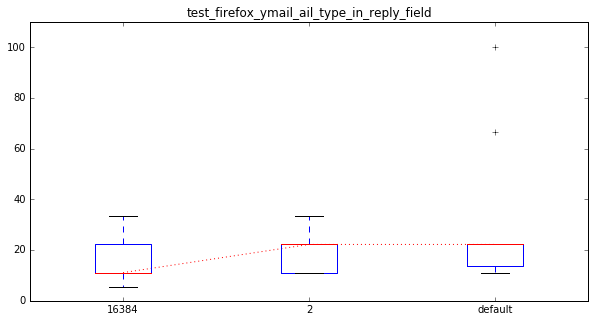

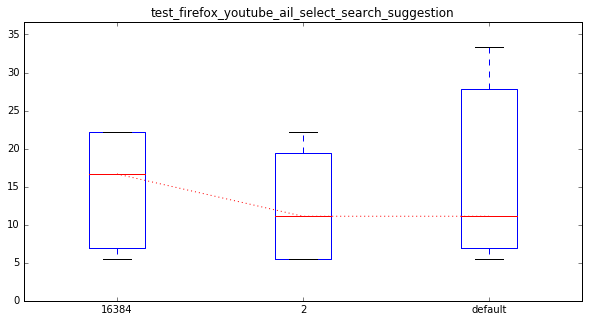

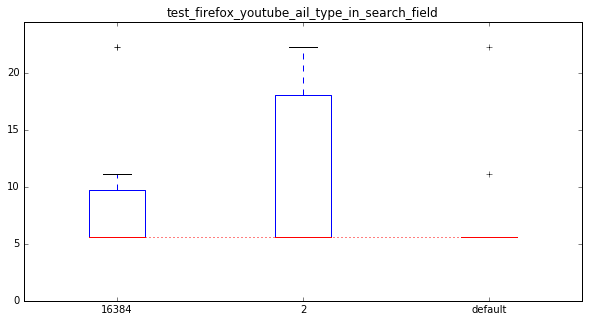

In [10]:
d_select.observe(update_c_range, 'value')
interactive_obj = interactive(view3, preference_value=c_slider,preference_name=d_select)
interactive_obj

